In [2]:
import os
import cv2
import math
import random
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.patches import Wedge
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from tqdm import tqdm

🩸 Cancer Detected: High Biomarker Activity!


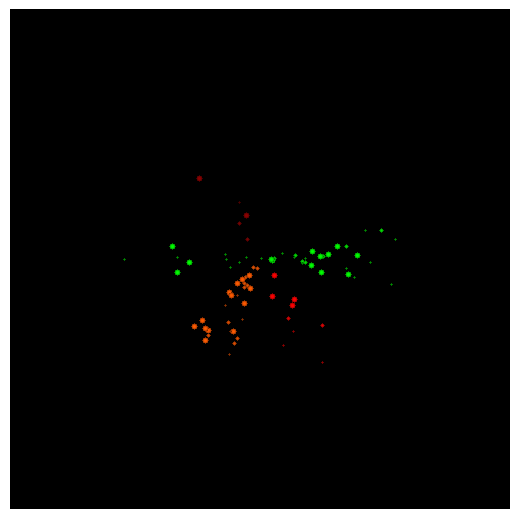

In [ ]:
# stage 1 - tinkering

size = 500
center = (size // 2, size // 2)
radius_max = size // 2 - 20  # keep margin

colors = {
    'Ca125': (0, 255, 0),     # Green  
    'forl1': (0, 0, 255),     # Red  
    'He4': (0, 90, 255),      # Orange-red  
    'Positive': (0, 255, 0),     # Green  
    'Negative': (0, 0, 139),     # Deep Red  
    'Blank': None             # Sixth side stays empty
}

# blank image
image = np.zeros((size, size, 3), dtype=np.uint8)

# Add noise to circle edges and blur it
def add_noise(image, center, radius, color):
    temp = np.zeros_like(image)
    cv2.circle(temp, center, radius, color, -1)

    noise_intensity = int(radius * 0.5)
    for _ in range(noise_intensity * 10):
        x = random.randint(center[0] - radius, center[0] + radius)
        y = random.randint(center[1] - radius, center[1] + radius)
        if (x - center[0])**2 + (y - center[1])**2 <= radius**2:
            jitter = random.randint(-30, 30)
            noisy_color = tuple(np.clip(np.array(color) + jitter, 0, 255))
            temp[y, x] = noisy_color

    blurred = cv2.GaussianBlur(temp, (5, 5), 1)
    mask = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
    image[mask > 0] = blurred[mask > 0]

# radial biased coordinate (closer to center bias)
def biased_radius():
    return int(radius_max * (np.random.beta(2, 5)))

# draw blobs along radial spokes
def draw_radial_blobs(image, angle, color, num_blobs):
    for _ in range(num_blobs):
        r = biased_radius()
        spread = 15  # small angular spread
        theta = math.radians(angle + random.randint(-spread, spread))

        x = int(center[0] + r * math.cos(theta))
        y = int(center[1] + r * math.sin(theta))

        radius = random.randint(1, 3)
        add_noise(image, (x, y), radius, color)

positive = random.random() < 0.3
positive = random.random() < 0.3
if positive:
    print("🩸 Cancer Detected: High Biomarker Activity!")
else:
    print("✅ No Cancer Detected: Low Biomarker Activity.")
menopausal_status = "pre"

for i, (marker, color) in enumerate(colors.items()):
    if color is None:  # Skip the blank spoke
        continue

    angle = i * (360 / 6)  # six spokes

    if positive:
        if menopausal_status == "pre":
            if marker == 'Ca125':
                num_blobs = random.randint(20, 35)
            elif marker == 'forl1':
                num_blobs = random.randint(5, 12)
            elif marker == 'He4':
                num_blobs = random.randint(20, 35)
            elif marker == 'Positive':
                num_blobs = random.randint(6, 12)
            elif marker == 'Negative':
                num_blobs = random.randint(5, 12)
        else:  
            if marker == 'Ca125':
                num_blobs = random.randint(25, 40)
            elif marker == 'forl1':
                num_blobs = random.randint(6, 15)
            elif marker == 'He4':
                num_blobs = random.randint(25, 40)
            elif marker == 'Positive':
                num_blobs = random.randint(8, 15)
            elif marker == 'Negative':
                num_blobs = random.randint(8, 15)
    else:
        if menopausal_status == "pre":
            if marker == 'Ca125':
                num_blobs = random.randint(5, 10)
            elif marker == 'forl1':
                num_blobs = random.randint(0, 2)
            elif marker == 'He4':
                num_blobs = random.randint(8, 15)
            elif marker == 'Positive':
                num_blobs = random.randint(0, 2)
            elif marker == 'Negative':
                num_blobs = random.randint(0, 2)
        else:
            if marker == 'Ca125':
                num_blobs = random.randint(3, 7)
            elif marker == 'forl1':
                num_blobs = random.randint(0, 2)
            elif marker == 'He4':
                num_blobs = random.randint(5, 10)
            elif marker == 'Positive':
                num_blobs = random.randint(0, 2)
            elif marker == 'Negative':
                num_blobs = random.randint(0, 1)

    draw_radial_blobs(image, angle, color, num_blobs)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.axis('off')
plt.tight_layout(pad=0)
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.savefig('hex_spokes.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


✅ No Cancer Detected: Low Biomarker Activity.


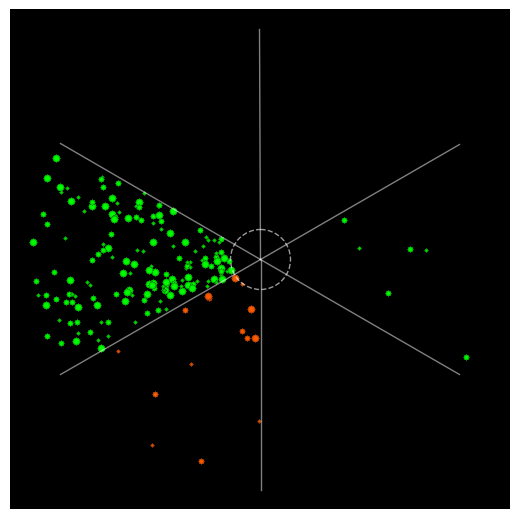

In [ ]:
# stage 2 - definition

size = 500
center = (size // 2, size // 2)
radius_min = 30   # leave central circle empty (60px diameter)
radius_max = size // 2 - 20  # outer limit

colors = {
    'Ca125': (0, 255, 0),     # Green  
    'forl1': (0, 0, 255),     # Red  
    'He4': (0, 90, 255),      # Orange-red  
    'Positive': (0, 255, 0),     # Green  
    'Negative': (0, 0, 139),     # Deep Red  
    'Blank': None             # Sixth side stays empty
}

# blank image
image = np.zeros((size, size, 3), dtype=np.uint8)

# Add noisy blurred blobs
def add_noise(image, center, radius, color):
    temp = np.zeros_like(image)
    cv2.circle(temp, center, radius, color, -1)

    noise_intensity = int(radius * 0.5)
    for _ in range(noise_intensity * 10):
        x = random.randint(center[0] - radius, center[0] + radius)
        y = random.randint(center[1] - radius, center[1] + radius)
        if (x - center[0])**2 + (y - center[1])**2 <= radius**2:
            jitter = random.randint(-30, 30)
            noisy_color = tuple(np.clip(np.array(color) + jitter, 0, 255))
            temp[y, x] = noisy_color

    blurred = cv2.GaussianBlur(temp, (5, 5), 1)
    mask = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
    image[mask > 0] = blurred[mask > 0]

# Biased radial coordinate (spread out, starting from radius_min)
def biased_radius():
    # force uniform outward spread between radius_min and radius_max
    return int(np.random.uniform(radius_min, radius_max))

def draw_radial_blobs(image, angle_center, color, num_blobs):
    min_angle = angle_center - 30
    max_angle = angle_center + 30
    for _ in range(num_blobs):
        r = biased_radius()
        theta = math.radians(random.uniform(min_angle, max_angle))  # ✅ constrained
        x = int(center[0] + r * math.cos(theta))
        y = int(center[1] + r * math.sin(theta))
        add_noise(image, (x, y), random.randint(2, 4), color)

def draw_petal(ax, center, r_inner, r_outer, theta1, theta2, color, alpha=0.15):
    """
    Draws a petal-shaped wedge sector.
    """
    wedge = Wedge(center, r_outer, theta1, theta2, width=r_outer-r_inner,
                  facecolor=np.array(color)/255.0, edgecolor="white", lw=1, alpha=alpha)
    ax.add_patch(wedge)


positive = random.random() < 0.3
if positive:
    print("🩸 Cancer Detected: High Biomarker Activity!")
else:
    print("✅ No Cancer Detected: Low Biomarker Activity.")
menopausal_status = "pre"

for i, (marker, color) in enumerate(colors.items()):
    if color is None:  # Skip the blank spoke
        continue

    angle = i * (360 / 6)  # six spokes

    if positive:
        if menopausal_status == "pre":
            if marker == 'Ca125':
                num_blobs = random.randint(20, 35)
            elif marker == 'forl1':
                num_blobs = random.randint(5, 12)
            elif marker == 'He4':
                num_blobs = random.randint(20, 35)
            elif marker == 'Positive':
                num_blobs = random.randint(100, 200)
            elif marker == 'Negative':
                num_blobs = random.randint(0, 0)
        else:  
            if marker == 'Ca125':
                num_blobs = random.randint(25, 40)
            elif marker == 'forl1':
                num_blobs = random.randint(6, 15)
            elif marker == 'He4':
                num_blobs = random.randint(25, 40)
            elif marker == 'Positive':
                num_blobs = random.randint(100, 200)
            elif marker == 'Negative':
                num_blobs = random.randint(0, 0)
    else:
        if menopausal_status == "pre":
            if marker == 'Ca125':
                num_blobs = random.randint(5, 10)
            elif marker == 'forl1':
                num_blobs = random.randint(0, 2)
            elif marker == 'He4':
                num_blobs = random.randint(8, 15)
            elif marker == 'Positive':
                num_blobs = random.randint(100, 200)
            elif marker == 'Negative':
                num_blobs = random.randint(0, 0)
        else:
            if marker == 'Ca125':
                num_blobs = random.randint(3, 7)
            elif marker == 'forl1':
                num_blobs = random.randint(0, 2)
            elif marker == 'He4':
                num_blobs = random.randint(5, 10)
            elif marker == 'Positive':
                num_blobs = random.randint(100, 200)
            elif marker == 'Negative':
                num_blobs = random.randint(0, 0)

    draw_radial_blobs(image, angle, color, num_blobs)

# Convert and show
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.axis('off')


# # Can be commented
# -------------------------
# OPTIONAL: draw sector borders + central circle
for i in range(6):
    angle = i * (360 / 6) - 30   # rotate by -30° for symmetry
    x_end = int(center[0] + radius_max * math.cos(math.radians(angle)))
    y_end = int(center[1] + radius_max * math.sin(math.radians(angle)))
    plt.plot([center[0], x_end], [center[1], y_end], color="white", lw=1, alpha=0.5)

# Draw central guiding circle (radius=30px)
circle = plt.Circle(center, 30, color="white", fill=False, linestyle="--", alpha=0.6)
plt.gca().add_patch(circle)
# -------------------------

plt.tight_layout(pad=0)
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.savefig('flower_petals.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()



🩸 Cancer Detected: High Biomarker Activity!


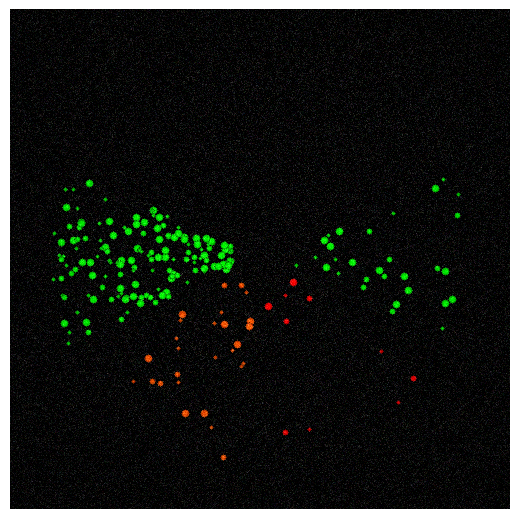

In [7]:
# stage 3 - finalized flow (real life)

SHOW_PETAL_BORDERS = False
curver = 3.95  # petal curvature factor
PETAL_GAP = 10
size = 500
center = (size // 2, size // 2)
radius_min = 30   # leave central circle empty (60px diameter)
radius_max = size // 2 - 40   # outer limit

colors = {
    'Ca125': (0, 255, 0),     # Green  
    'forl1': (0, 0, 255),     # Red  
    'He4': (0, 90, 255),      # Orange-red  
    'Positive': (0, 255, 0),     # Green  
    'Negative': (0, 0, 139),     # Deep Red  
    'Blank': None             # Sixth side stays empty
}

# image + blobs
image = np.zeros((size, size, 3), dtype=np.uint8)

def add_noise(image, center, radius, color):
    temp = np.zeros_like(image)
    cv2.circle(temp, center, radius, color, -1)

    noise_intensity = int(radius * 0.5)
    for _ in range(noise_intensity * 10):
        x = random.randint(center[0] - radius, center[0] + radius)
        y = random.randint(center[1] - radius, center[1] + radius)
        if (x - center[0])**2 + (y - center[1])**2 <= radius**2:
            jitter = random.randint(-30, 30)
            noisy_color = tuple(np.clip(np.array(color) + jitter, 0, 255))
            temp[y, x] = noisy_color

    blurred = cv2.GaussianBlur(temp, (5, 5), 1)
    mask = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
    image[mask > 0] = blurred[mask > 0]

def biased_radius():
    return int(np.random.uniform(radius_min, radius_max))

def draw_radial_blobs(image, angle_center, color, num_blobs):
    half_angle = 30 - PETAL_GAP / 2
    min_angle = angle_center - half_angle
    max_angle = angle_center + half_angle
    for _ in range(num_blobs):
        r = biased_radius()
        theta = math.radians(random.uniform(min_angle, max_angle)) 
        x = int(center[0] + r * math.cos(theta))
        y = int(center[1] + r * math.sin(theta))
        add_noise(image, (x, y), random.randint(2, 4), color)

# actual petal
def draw_curved_petal(ax, center, r_inner, r_outer, theta1, theta2, color, alpha=0.15):
    cx, cy = center
    t1 = math.radians(theta1)
    t2 = math.radians(theta2)
    tm = (t1 + t2) / 2  

    x1, y1 = cx + r_inner * math.cos(t1), cy + r_inner * math.sin(t1)
    x2, y2 = cx + r_inner * math.cos(t2), cy + r_inner * math.sin(t2)
    X1, Y1 = cx + r_outer * math.cos(t1), cy + r_outer * math.sin(t1)
    X2, Y2 = cx + r_outer * math.cos(t2), cy + r_outer * math.sin(t2)

    bulge = r_outer * curver
    control1 = (cx + bulge * math.cos(tm - 0.5), cy + bulge * math.sin(tm - 0.5))
    control2 = (cx + bulge * math.cos(tm + 0.5), cy + bulge * math.sin(tm + 0.5))

    verts = [
        (x1, y1),        # start at inner arc
        (X1, Y1),        # outer start
        control1,        # curve control 1
        control2,        # curve control 2
        (X2, Y2),        # outer end
        (x2, y2),        # back to inner arc
        (x1, y1)         # close
    ]

    codes = [
        Path.MOVETO,
        Path.LINETO,
        Path.CURVE4,
        Path.CURVE4,
        Path.LINETO,
        Path.LINETO,
        Path.CLOSEPOLY
    ]

    path = Path(verts, codes)

    if SHOW_PETAL_BORDERS:
        patch = PathPatch(path, facecolor="none",
                          edgecolor="white", lw=1.8, alpha=0.9)
        ax.add_patch(patch)

# sample config
positive = random.random() < 0.3
if positive:
    print("🩸 Cancer Detected: High Biomarker Activity!")
else:
    print("✅ No Cancer Detected: Low Biomarker Activity.")
menopausal_status = "pre"

for i, (marker, color) in enumerate(colors.items()):
    if color is None:
        continue
    angle = i * (360 / 6)

    # assign blobs
    if positive:
        if menopausal_status == "pre":
            if marker == 'Ca125': num_blobs = random.randint(20, 35)
            elif marker == 'forl1': num_blobs = random.randint(5, 12)
            elif marker == 'He4': num_blobs = random.randint(20, 35)
            elif marker == 'Positive': num_blobs = random.randint(100, 200)
            elif marker == 'Negative': num_blobs = 0
        else:
            if marker == 'Ca125': num_blobs = random.randint(25, 40)
            elif marker == 'forl1': num_blobs = random.randint(6, 15)
            elif marker == 'He4': num_blobs = random.randint(25, 40)
            elif marker == 'Positive': num_blobs = random.randint(100, 200)
            elif marker == 'Negative': num_blobs = 0
    else:
        if menopausal_status == "pre":
            if marker == 'Ca125': num_blobs = random.randint(5, 10)
            elif marker == 'forl1': num_blobs = random.randint(0, 2)
            elif marker == 'He4': num_blobs = random.randint(8, 15)
            elif marker == 'Positive': num_blobs = random.randint(100, 200)
            elif marker == 'Negative': num_blobs = 0
        else:
            if marker == 'Ca125': num_blobs = random.randint(3, 7)
            elif marker == 'forl1': num_blobs = random.randint(0, 2)
            elif marker == 'He4': num_blobs = random.randint(5, 10)
            elif marker == 'Positive': num_blobs = random.randint(100, 200)
            elif marker == 'Negative': num_blobs = 0

    draw_radial_blobs(image, angle, color, num_blobs)

def add_realistic_camera_noise(image, luminance_intensity=15, chroma_intensity=5, vignette_strength=0.3):
    h, w, c = image.shape

    lum_noise = np.random.normal(0, luminance_intensity, (h, w, 1)).astype(np.int16)
    lum_noise = np.repeat(lum_noise, 3, axis=2)

    chroma_noise = np.random.normal(0, chroma_intensity, (h, w, c)).astype(np.int16)

    noisy_img = image.astype(np.int16) + lum_noise + chroma_noise

    Y, X = np.ogrid[:h, :w]
    cx, cy = w / 2, h / 2
    r = np.sqrt((X - cx) ** 2 + (Y - cy) ** 2)
    r_norm = r / r.max()
    vignette = 1 - vignette_strength * (r_norm ** 2)
    vignette = vignette[..., np.newaxis]  # expand to RGB

    noisy_img = noisy_img * vignette

    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)

    return noisy_img

# Show
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = add_realistic_camera_noise(image, luminance_intensity=18, chroma_intensity=6, vignette_strength=0.25)

plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.axis('off')

# # Can be commented
# -------------------------
# OPTIONAL: draw sector borders + central circle
ax = plt.gca()  
for i, (marker, color) in enumerate(colors.items()):
    if color is None: 
        continue
    angle_center = i * (360 / 6)
    half_angle = 30 - PETAL_GAP/2
    draw_curved_petal(ax, center, radius_min, radius_max,
                    angle_center - half_angle, angle_center + half_angle, color)

if SHOW_PETAL_BORDERS:
    circle = plt.Circle(center, radius_min, color="white", fill=False, linestyle="--", alpha=0.6)
    ax.add_patch(circle)
# -------------------------

plt.tight_layout(pad=0)
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.savefig('example/chip_image_v2.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


✅ No Cancer Detected: Low Biomarker Activity.


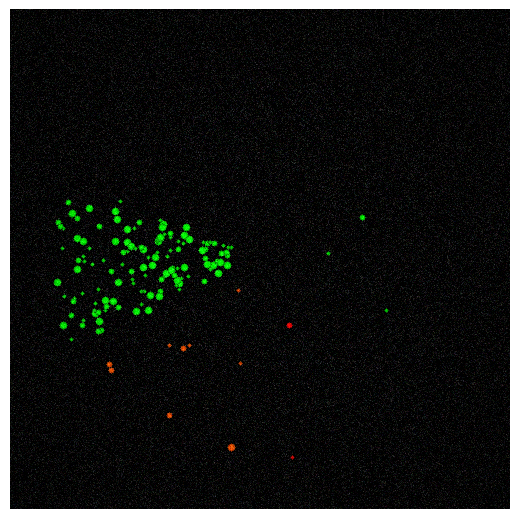

In [ ]:
# stage 3.5 - sample error (real life)

menopausal_status = "post"
SHOW_PETAL_BORDERS = False
curver = 3.95  # petal curvature factor
PETAL_GAP = 10
size = 500
error_possibility = 0.01
center = (size // 2, size // 2)
radius_min = 30   # leave central circle empty (60px diameter)
radius_max = size // 2 - 40   # outer limit

colors = {
    'Ca125': (0, 255, 0),     # Green  
    'forl1': (0, 0, 255),     # Red  
    'He4': (0, 90, 255),      # Orange-red  
    'Positive': (0, 255, 0),     # Green  
    'Negative': (0, 0, 139),     # Deep Red  
    'Blank': None             # Sixth side stays empty
}

# image + blobs
image = np.zeros((size, size, 3), dtype=np.uint8)

def add_noise(image, center, radius, color):
    temp = np.zeros_like(image)
    cv2.circle(temp, center, radius, color, -1)

    noise_intensity = int(radius * 0.5)
    for _ in range(noise_intensity * 10):
        x = random.randint(center[0] - radius, center[0] + radius)
        y = random.randint(center[1] - radius, center[1] + radius)
        if (x - center[0])**2 + (y - center[1])**2 <= radius**2:
            jitter = random.randint(-30, 30)
            noisy_color = tuple(np.clip(np.array(color) + jitter, 0, 255))
            temp[y, x] = noisy_color

    blurred = cv2.GaussianBlur(temp, (5, 5), 1)
    mask = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
    image[mask > 0] = blurred[mask > 0]

def biased_radius():
    return int(np.random.uniform(radius_min, radius_max))

def draw_radial_blobs(image, angle_center, color, num_blobs):
    half_angle = 30 - PETAL_GAP / 2
    min_angle = angle_center - half_angle
    max_angle = angle_center + half_angle
    for _ in range(num_blobs):
        r = biased_radius()
        theta = math.radians(random.uniform(min_angle, max_angle)) 
        x = int(center[0] + r * math.cos(theta))
        y = int(center[1] + r * math.sin(theta))
        add_noise(image, (x, y), random.randint(2, 4), color)

# actual petal
def draw_curved_petal(ax, center, r_inner, r_outer, theta1, theta2, color, alpha=0.15):
    cx, cy = center
    t1 = math.radians(theta1)
    t2 = math.radians(theta2)
    tm = (t1 + t2) / 2  

    x1, y1 = cx + r_inner * math.cos(t1), cy + r_inner * math.sin(t1)
    x2, y2 = cx + r_inner * math.cos(t2), cy + r_inner * math.sin(t2)
    X1, Y1 = cx + r_outer * math.cos(t1), cy + r_outer * math.sin(t1)
    X2, Y2 = cx + r_outer * math.cos(t2), cy + r_outer * math.sin(t2)

    bulge = r_outer * curver
    control1 = (cx + bulge * math.cos(tm - 0.5), cy + bulge * math.sin(tm - 0.5))
    control2 = (cx + bulge * math.cos(tm + 0.5), cy + bulge * math.sin(tm + 0.5))

    verts = [
        (x1, y1),        # start at inner arc
        (X1, Y1),        # outer start
        control1,        # curve control 1
        control2,        # curve control 2
        (X2, Y2),        # outer end
        (x2, y2),        # back to inner arc
        (x1, y1)         # close
    ]

    codes = [
        Path.MOVETO,
        Path.LINETO,
        Path.CURVE4,
        Path.CURVE4,
        Path.LINETO,
        Path.LINETO,
        Path.CLOSEPOLY
    ]

    path = Path(verts, codes)

    if SHOW_PETAL_BORDERS:
        patch = PathPatch(path, facecolor="none",
                          edgecolor="white", lw=1.8, alpha=0.9)
        ax.add_patch(patch)

# sample config
positive = random.random() < 0.3

broken_sample = random.random() < error_possibility

if broken_sample:
    print("⚠️ Sample Detection Error: Broken Sample Suspected")
elif positive:
    print("🩸 Cancer Detected: High Biomarker Activity!")
else:
    print("✅ No Cancer Detected: Low Biomarker Activity.")


num_blobs_map = {}

# baseline 
for i, (marker, color) in enumerate(colors.items()):
    if color is None:
        continue

    if positive:
        if menopausal_status == "pre":
            if marker == 'Ca125': num_blobs = random.randint(20, 35)
            elif marker == 'forl1': num_blobs = random.randint(5, 12)
            elif marker == 'He4': num_blobs = random.randint(20, 35)
            elif marker == 'Positive': num_blobs = random.randint(100, 200)
            elif marker == 'Negative': num_blobs = 0
        else:
            if marker == 'Ca125': num_blobs = random.randint(25, 40)
            elif marker == 'forl1': num_blobs = random.randint(6, 15)
            elif marker == 'He4': num_blobs = random.randint(25, 40)
            elif marker == 'Positive': num_blobs = random.randint(100, 200)
            elif marker == 'Negative': num_blobs = 0
    else:
        if menopausal_status == "pre":
            if marker == 'Ca125': num_blobs = random.randint(5, 10)
            elif marker == 'forl1': num_blobs = random.randint(0, 2)
            elif marker == 'He4': num_blobs = random.randint(8, 15)
            elif marker == 'Positive': num_blobs = random.randint(100, 200)
            elif marker == 'Negative': num_blobs = 0
        else:
            if marker == 'Ca125': num_blobs = random.randint(3, 7)
            elif marker == 'forl1': num_blobs = random.randint(0, 2)
            elif marker == 'He4': num_blobs = random.randint(5, 10)
            elif marker == 'Positive': num_blobs = random.randint(100, 200)
            elif marker == 'Negative': num_blobs = 0

    num_blobs_map[marker] = num_blobs

if broken_sample:
    case = random.choice(["neg_pos0", "neg_pos1", "neg0_pos0"])
    if case == "neg_pos0":
        num_blobs_map["Negative"] = random.randint(20, 40)
        num_blobs_map["Positive"] = 0
    elif case == "neg_pos1":
        num_blobs_map["Negative"] = random.randint(20, 40)
        num_blobs_map["Positive"] = random.randint(100, 200)
    elif case == "neg0_pos0":
        num_blobs_map["Negative"] = 0
        num_blobs_map["Positive"] = 0


for i, (marker, color) in enumerate(colors.items()):
    if color is None:
        continue
    angle = i * (360 / 6)
    draw_radial_blobs(image, angle, color, num_blobs_map[marker])

if broken_sample:
    case = random.choice(["neg_pos0", "neg_pos1", "neg0_pos0"])
    if case == "neg_pos0":
        num_blobs_map["Negative"] = random.randint(20, 40)   # should not be active
        num_blobs_map["Positive"] = 0                       # missing
    elif case == "neg_pos1":
        num_blobs_map["Negative"] = random.randint(20, 40)   # wrongly active
        num_blobs_map["Positive"] = random.randint(100, 200) # wrongly co-active
    elif case == "neg0_pos0":
        num_blobs_map["Negative"] = 0
        num_blobs_map["Positive"] = 0                       # wrongly missing



def add_realistic_camera_noise(image, luminance_intensity=15, chroma_intensity=5, vignette_strength=0.3):
    h, w, c = image.shape

    lum_noise = np.random.normal(0, luminance_intensity, (h, w, 1)).astype(np.int16)
    lum_noise = np.repeat(lum_noise, 3, axis=2)

    chroma_noise = np.random.normal(0, chroma_intensity, (h, w, c)).astype(np.int16)

    noisy_img = image.astype(np.int16) + lum_noise + chroma_noise

    Y, X = np.ogrid[:h, :w]
    cx, cy = w / 2, h / 2
    r = np.sqrt((X - cx) ** 2 + (Y - cy) ** 2)
    r_norm = r / r.max()
    vignette = 1 - vignette_strength * (r_norm ** 2)
    vignette = vignette[..., np.newaxis]  # expand to RGB

    noisy_img = noisy_img * vignette

    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)

    return noisy_img

# Show
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = add_realistic_camera_noise(image, luminance_intensity=18, chroma_intensity=6, vignette_strength=0.25)

plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.axis('off')

# # Can be commented
# -------------------------
# OPTIONAL: draw sector borders + central circle
ax = plt.gca()  
for i, (marker, color) in enumerate(colors.items()):
    if color is None: 
        continue
    angle_center = i * (360 / 6)
    half_angle = 30 - PETAL_GAP/2
    draw_curved_petal(ax, center, radius_min, radius_max,
                    angle_center - half_angle, angle_center + half_angle, color)

if SHOW_PETAL_BORDERS:
    circle = plt.Circle(center, radius_min, color="white", fill=False, linestyle="--", alpha=0.6)
    ax.add_patch(circle)
# -------------------------

plt.tight_layout(pad=0)
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.savefig('example/chip_image_v2.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


In [ ]:
# Creating synthetic dataset

SHOW_PETAL_BORDERS = False
curver = 3.95
PETAL_GAP = 10
SIZE = 500
CENTER = (SIZE // 2, SIZE // 2)
RADIUS_MIN = 30
RADIUS_MAX = SIZE // 2 - 40
OUTPUT_DIR = "dataset/CustomChip"
NUM_SAMPLES = 10000

colors = {
    'Ca125': (0, 255, 0),
    'forl1': (0, 0, 255),
    'He4': (0, 90, 255),
    'Positive': (0, 255, 0),
    'Negative': (0, 0, 139),
    'Blank': None
}

def add_noise(image, center, radius, color):
    temp = np.zeros_like(image)
    cv2.circle(temp, center, radius, color, -1)
    noise_intensity = int(radius * 0.5)
    for _ in range(noise_intensity * 10):
        x = random.randint(center[0] - radius, center[0] + radius)
        y = random.randint(center[1] - radius, center[1] + radius)
        if (x - center[0])**2 + (y - center[1])**2 <= radius**2:
            jitter = random.randint(-30, 30)
            noisy_color = tuple(np.clip(np.array(color) + jitter, 0, 255))
            temp[y, x] = noisy_color
    blurred = cv2.GaussianBlur(temp, (5, 5), 1)
    mask = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
    image[mask > 0] = blurred[mask > 0]

def biased_radius():
    return int(np.random.uniform(RADIUS_MIN, RADIUS_MAX))

def draw_radial_blobs(image, angle_center, color, num_blobs):
    half_angle = 30 - PETAL_GAP / 2
    min_angle = angle_center - half_angle
    max_angle = angle_center + half_angle
    for _ in range(num_blobs):
        r = biased_radius()
        theta = math.radians(random.uniform(min_angle, max_angle))
        x = int(CENTER[0] + r * math.cos(theta))
        y = int(CENTER[1] + r * math.sin(theta))
        add_noise(image, (x, y), random.randint(2, 4), color)

def add_realistic_camera_noise(image, luminance_intensity=15, chroma_intensity=5, vignette_strength=0.3):
    h, w, c = image.shape
    lum_noise = np.random.normal(0, luminance_intensity, (h, w, 1)).astype(np.int16)
    lum_noise = np.repeat(lum_noise, 3, axis=2)
    chroma_noise = np.random.normal(0, chroma_intensity, (h, w, c)).astype(np.int16)
    noisy_img = image.astype(np.int16) + lum_noise + chroma_noise
    Y, X = np.ogrid[:h, :w]
    cx, cy = w / 2, h / 2
    r = np.sqrt((X - cx) ** 2 + (Y - cy) ** 2)
    r_norm = r / r.max()
    vignette = 1 - vignette_strength * (r_norm ** 2)
    vignette = vignette[..., np.newaxis]
    noisy_img = noisy_img * vignette
    return np.clip(noisy_img, 0, 255).astype(np.uint8)


def generate_sample(index, positive=True, menopausal_status="pre"):
    image = np.zeros((SIZE, SIZE, 3), dtype=np.uint8)

    for i, (marker, color) in enumerate(colors.items()):
        if color is None:
            continue
        angle = i * (360 / 6)

        if positive:
            if menopausal_status == "pre":
                num_blobs = {
                    'Ca125': random.randint(20, 35),
                    'forl1': random.randint(5, 12),
                    'He4': random.randint(20, 35),
                    'Positive': random.randint(100, 200),
                    'Negative': 0
                }.get(marker, 0)
            else:  # post
                num_blobs = {
                    'Ca125': random.randint(25, 40),
                    'forl1': random.randint(6, 15),
                    'He4': random.randint(25, 40),
                    'Positive': random.randint(100, 200),
                    'Negative': 0
                }.get(marker, 0)
        else:
            if menopausal_status == "pre":
                num_blobs = {
                    'Ca125': random.randint(5, 10),
                    'forl1': random.randint(0, 2),
                    'He4': random.randint(8, 15),
                    'Positive': random.randint(100, 200),
                    'Negative': 0
                }.get(marker, 0)
            else:  # post
                num_blobs = {
                    'Ca125': random.randint(3, 7),
                    'forl1': random.randint(0, 2),
                    'He4': random.randint(5, 10),
                    'Positive': random.randint(100, 200),
                    'Negative': 0
                }.get(marker, 0)

        draw_radial_blobs(image, angle, color, num_blobs)

    # noise
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = add_realistic_camera_noise(image, luminance_intensity=18,
                                       chroma_intensity=6, vignette_strength=0.25)

    # save
    label = "positive" if positive else "negative"
    output_path = os.path.join(OUTPUT_DIR, menopausal_status, label)
    os.makedirs(output_path, exist_ok=True)
    filename = f"sample_{index}.png"
    cv2.imwrite(os.path.join(output_path, filename), cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
    return filename, 1 if positive else 0, menopausal_status


def generate_dataset():
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    labels = []

    for i in tqdm(range(NUM_SAMPLES)):
        positive = random.random() < 0.3  # ~30% positive
        menopausal_status = random.choice(["pre", "post"])
        fname, lab, status = generate_sample(i, positive, menopausal_status)
        labels.append([fname, lab, status])

    np.savetxt(os.path.join(OUTPUT_DIR, "labels.csv"),
               labels,
               delimiter=",",
               fmt="%s",
               header="filename,label,menopause",
               comments="")
    print(f"Dataset generated in '{OUTPUT_DIR}'")

generate_dataset()


100%|██████████| 10000/10000 [1:21:50<00:00,  2.04it/s]

✅ Dataset generated in 'dataset'
